# Midterm - Summer 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite.

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`.




### Question 1 - Feature Engineering (5 points)

Write the posterior probability expressions for logistic regression for the problem you are given to solve.

$$p(y=1| \mathbf{x}, \mathbf w)=$$

$$p(y=0| \mathbf{x}, \mathbf w)=$$

The posterior probability in logistic regression is the probability of the target variable given the input variables. It is calculated using the logistic regression function, which transforms the linear combination of input variables and coefficients into a probability value between 0 and 1.


posterior probability can be used to update a previous belief once new information is obtained. Prior probability represents what is originally believed before new evidence is introduced, and posterior probability takes this new information into account

$P( y=1 |X,w) = Π_{i=1}^Nσ(x_i^{T},w)^{y_i}(1-σ(x_i^{T}w))^{1-y_i}$

$p(y=0|x)$ = 1 - $p(y=1|x)$

$y_{i}$ will either be 0 or 1, so exactly one of $y_i$ or 1 􀀀 $y_i$ will be nonzero, which picks out the correct contribution to the likelihood




### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.





$$p(y=1| \mathbf{x}, \mathbf w)= \hat{y}= \sigma (w^{T}x )$$

In data science, one of the fundamental information is  . Is the data linearly seperable and that help create the decision boundary , between different classes of data.
In this case we have a binary classification, where the data linearly seperable. If the take p(y=1)=p(y=0) boundary is given by the line where P(x|y=1) = P(x|y=0).




### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem.

NOTE: The loss will be a function that will include this function:

$$\sigma(a) = \frac{1}{1+e^{-a}}$$



$$L_{CE} = L( y , \hat{y}) = -log\space p(y,w) = -1/m[\sum_{i=1}^m \{y_i\space log \space \hat{y}_i + ( 1 - {y}_i) \space log(1-\hat{y}_i)\}]$$
which is called binary cross entropy loss function. where m is the number of samples y is the ground truth & $\hat{y}$ is the predicted y.
And predicted $\hat{y}^{(i)} = \sigma( w^{T} x(i)) $



### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.



$$ \nabla_\mathbf w L_{CE} = $$

$$ \nabla_\mathbf w L_{CE} = \sum_{i=1}^m (\hat{y}_i - y_i)x_i$$

 Just like RMSE where we start off calculating the error between the actual output and the predicted output (y-hat). The gradient descent algorithm behaves similarly, but it is based on a convex function.

 Starting point ins this case is an arbitrary point for us to evaluate the performance. From that, we will find the derivative (or slope), and from there, we can use a tangent line to observe the steepness of the slope. The slope will inform the updates to the parameters—i.e. the weights and bias.

 Slope at the starting point will be steeper, but as new parameters are generated, the steepness should gradually reduce until it reaches the lowest point on the curve, known as the point of convergence.   This called the local or global minimum ( based on the size used, complete set or mini batches ).

### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?



Logistic Regression Definitely get effected by imbalanced data sets. We can see using the Confusion matrix below. The result is the model is heavily baised towards the majority class and perform poorly on the minority class. We had close to 10% false negatives in the examples below ( see Confusion Matix )  .
Basic issue is unbalanced training data affects only the estimate of the model intercept , this of course skews all the predicted probabilities, which in turn compromises your predictions.

In [ ]:
# write your code here


### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills.

1. Use the dataset to train a logistic regressor that will predict the target variable $y$.

 2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$.

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.



In [ ]:
!pip install matplotlib
!pip install sklearn
!pip install pandas


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
file_path = '.'
file_name = 'CBC_data.csv'
data_df = pd.read_csv( f'{file_path}/{file_name}')
data_df.describe()
#syntax: df[ ‘Result’ ] = df[ data_df ].apply( lambda x: ‘Pass’ if x>=5 else ‘Fail’ )



,AGE,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT
count,3018.000000,2995.000000,2995.000000,2996.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000
mean,14.231942,6.397058,15.605309,9.738418,299.133556,476.942905,5588.133890,234.432721,3358.970952
std,6.506101,0.633286,1.600633,2.570528,290.512926,284.374317,1917.912302,64.877983,1125.665558
min,4.000000,3.800000,9.000000,4.000000,0.000000,0.000000,1599.000000,17.000000,148.000000
25%,8.000000,6.000000,14.500000,7.975000,101.000000,276.000000,4314.000000,196.000000,2582.500000
50%,14.000000,6.400000,15.600000,9.500000,226.000000,400.000000,5280.000000,232.000000,3264.000000
75%,20.000000,6.800000,16.700000,11.100000,409.000000,615.000000,6480.000000,273.000000,4033.000000
max,38.000000,8.300000,20.300000,26.700000,3216.000000,1920.000000,20292.000000,561.000000,9548.000000


In [ ]:
def read_data(file_path, file_name):
    return pd.read_csv( f'{file_path}/{file_name}')


def replace_nan(data_df):
    return data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

def prep_target(data_df):
    ''' Custom code written for just this data set '''
    data_df[ 'TARGET' ] = data_df[ 'PARASITE_STATUS' ].apply( lambda x: '0' if x == 'Negative'  else  1 )
    data_df.drop('PARASITE_STATUS', axis =1, inplace = True)
    data_df['TARGET'] = data_df['TARGET'].astype('float')
    return data_df

def encode_data(data_df):
     from sklearn import preprocessing
     le = preprocessing.LabelEncoder()
     for column_name in data_df.columns:
        if (data_df[column_name].dtype == object) and (data_df[column_name].dtype != None):
            data_df[column_name] = le.fit_transform(data_df[column_name])
        else:
            pass
     return data_df

def prep_x_y(data_df):
    return data_df[list(data_df.columns[:-1])] , data_df['TARGET']

def clean_dataset(data_df):
    assert isinstance(data_df, pd.DataFrame), "df needs to be a pd.DataFrame"
    data_df.dropna(inplace=True)
    indices_to_keep = ~data_df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return data_df[indices_to_keep].astype(np.float64)

def prep_dataset():
    data_df = read_data(file_path, file_name)
    data_df = prep_target(data_df)
    data_df.dropna(inplace=True)
    data_df = encode_data(data_df)

    return data_df


In [ ]:
from sklearn.model_selection import train_test_split

X,y = prep_x_y(prep_dataset())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

model = LogisticRegression(solver='liblinear', random_state=42, C=10.0)
model.fit(X_train,y_train)

LogisticRegression(C=10.0, random_state=42, solver='liblinear')

In [ ]:
from sklearn.model_selection import cross_validate

print ( f' intercept : {model.intercept_},  coefficient : {model.coef_ } ,\n Probabilities Distribution Curve: { model.predict_proba(X_test) }')
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model, X_test, y_test, scoring=scoring)
sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

model.predict(X_test)
print( scores['test_recall_macro'])

# cores = cross_validate(model, X, y, scoring=scoring, return_train_score= True)
# sorted(scores.keys())
# ['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

# model.predict(X_test)
# print (scores['test_recall_macro'])

#print ( f' score : {model.score(X_test, y_test) }')



 intercept : [-0.04914148],  coefficient : [[-9.76547059e-05  1.16900748e-01 -3.67706100e-01 -5.05596664e-02
  -8.37302074e-02 -3.22206619e-02 -1.06836216e-01 -1.39504482e-01
   8.32902087e-03  1.41363681e-04  5.68610889e-05  1.21747292e-04
   3.87759967e-03 -2.33623636e-04]] ,
 Probabilities Distribution Curve: [[0.97871988 0.02128012]
 [0.89989002 0.10010998]
 [0.95271838 0.04728162]
 ...
 [0.96104535 0.03895465]
 [0.95326097 0.04673903]
 [0.92922174 0.07077826]]
[0.5        0.54166667 0.5        0.5        0.5       ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

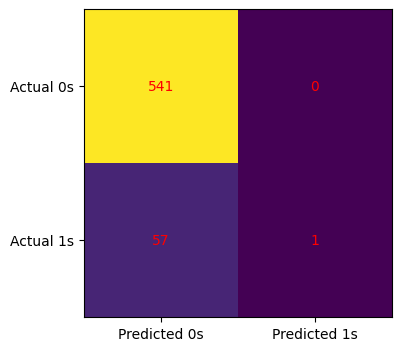

In [ ]:
confusion_matrix(y_test, model.predict(X_test))
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Accuracy = {accuracy}")


Accuracy = 0.9048414023372288


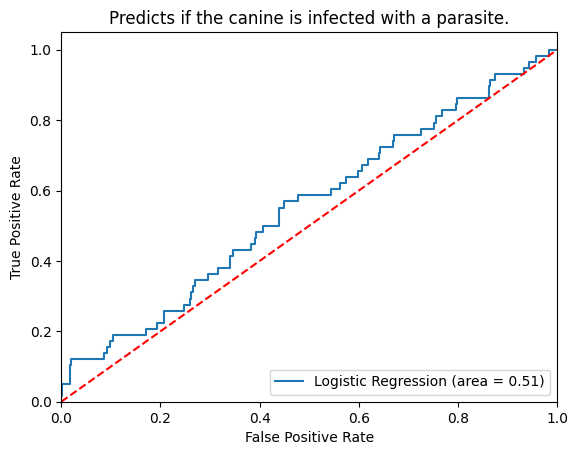

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('Predicts if the canine is infected with a parasite.')
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision = precision_score(y_test, model.predict(X_test))
recall = recall_score(y_test, model.predict(X_test))
f1score = f1_score(y_test, model.predict(X_test))

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.0
Recall = 0.0
F1 Score = 0.0


/Users/vishalchadha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Try Using Balanced Tree

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    class_weight='balanced' # handle imbalanced classes
)
# fit the model on the training data
model.fit(X_train, y_train)
# and then predict y for the test inputs
y_test_predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_test_predictions)
precision = precision_score(y_test, y_test_predictions)
recall = recall_score(y_test, y_test_predictions)
f1score = f1_score(y_test, y_test_predictions)

print(f"Accuracy = {accuracy.round(4)}")
print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 0.601
Precision = 0.1181
Recall = 0.4828
F1 Score = 0.1898


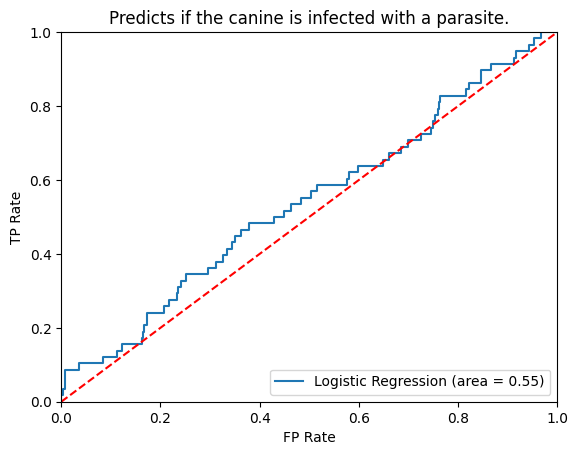

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('Predicts if the canine is infected with a parasite.')
plt.legend(loc="lower right")
plt.show()